In [1]:
import pandas

df = pandas.read_csv("data/comedy.csv")

print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [24]:
#To make a decision tree, all data has to be numerical.


datalabel = {'UK' : 0, 'USA' : 1, 'N' : 2}
df['Nationality'] = df['Nationality'].map(datalabel)
datalabel = {'NO' : 0, 'YES' : 1}
df['Go'] = df['Go'].map(datalabel)
print(df)


    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [25]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

x_data = df[features]
y_data = df['Go']

print(x_data)
print(y_data)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

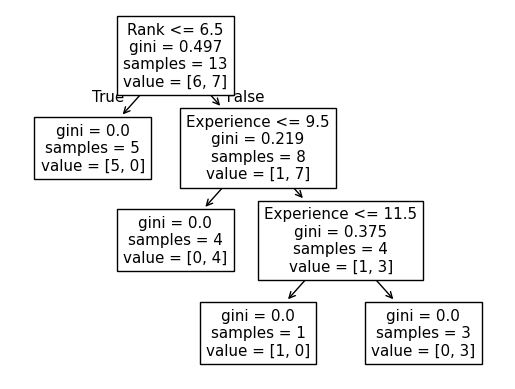

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_data, y_data) #fit the data to the decision tree

tree.plot_tree(dtree, feature_names=features)

In [27]:
#Example: Should I go see a show starring a 40 years old American comedian, with 10 years of experience, and a comedy ranking of 7?

print(dtree.predict([[40, 10, 7, 1]]))  #Output: [1] -> YES, [0] -> NO

#You will see that the Decision Tree gives you different results if you run it enough times, even if you feed it with the same data.

#That is because the Decision Tree does not give us a 100% certain answer. It is based on the probability of an outcome, and the answer will vary.

[0]


/home/sirkumar/python3.12_venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
